# Regression Demo

In [1]:
#coding=utf-8
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import datasets

# 1. Linear vs Ridge vs Lasso vs LinearSVR

In [2]:
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split

## 1.1 simple 1d test

In [3]:
LR = linear_model.LinearRegression()
Ridge = linear_model.Ridge(alpha = 3.0, random_state = 0)
Lasso = linear_model.Lasso(alpha = 1, random_state = 0)
LinearSVR = svm.SVR(C = 10.0, epsilon = 1.0, kernel = 'linear')

In [4]:
X, y = datasets.make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,  bias=100.0)

In [5]:
LR.fit(X, y)
Ridge.fit(X, y)
Lasso.fit(X, y)
LinearSVR.fit(X, y)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

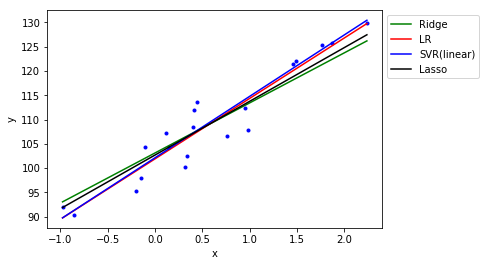

In [6]:
x = np.linspace(X.min(), X.max(), 7)
coef_r = Ridge.coef_ * x + Ridge.intercept_
coef_ = LR.coef_ * x + LR.intercept_
coef_s = LinearSVR.coef_[0] * x + LinearSVR.intercept_[0]
coef_l = Lasso.coef_ * x + Lasso.intercept_
plt.plot(X, y, 'b.')
plt.plot(x, coef_r, 'g-', label="Ridge")
plt.plot(x, coef_, 'r-', label="LR")
plt.plot(x, coef_s, 'b-', label="SVR(linear)")
plt.plot(x, coef_l, 'k-', label="Lasso")
plt.legend(loc = 2, bbox_to_anchor=(1.0, 1.0))
plt.xlabel('x')
plt.ylabel('y')

## 1.2 simple 1d test with strong outliers

In [7]:
X, y = datasets.make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,  bias=100.0)
rng = np.random.RandomState(0)
# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
x = np.linspace(X.min(), X.max(), 7)

In [8]:
LR.fit(X, y)
Ridge.fit(X, y)
Lasso.fit(X, y)
LinearSVR.fit(X, y)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

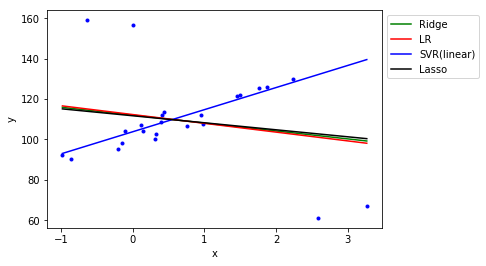

In [9]:
coef_r = Ridge.coef_ * x + Ridge.intercept_
coef_ = LR.coef_ * x + LR.intercept_
coef_s = LinearSVR.coef_[0] * x + LinearSVR.intercept_[0]
coef_l = Lasso.coef_ * x + Lasso.intercept_
plt.plot(X, y, 'b.')
plt.plot(x, coef_r, 'g-', label="Ridge")
plt.plot(x, coef_, 'r-', label="LR")
plt.plot(x, coef_s, 'b-', label="SVR(linear)")
plt.plot(x, coef_l, 'k-', label="Lasso")
plt.legend(loc = 2, bbox_to_anchor=(1.0, 1.0))
plt.xlabel('x')
plt.ylabel('y')

## 1.3 multi-dimentional test

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [11]:
SS = StandardScaler()

In [12]:
X, y = datasets.make_regression(n_samples=1000, n_features=10, n_informative=8, effective_rank=None, n_targets=1, bias=2.0, noise=0.2, random_state=2)
X = SS.fit_transform(X)
y = SS.fit_transform(y.reshape(-1, 1))
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train += np.random.randn(X_train.shape[0], X_train.shape[1]) * 0.5
X = np.vstack((X_train, X_test))

LR RMSE: 0.19100403966
Ridge RMSE: 0.202747018598
Lasso RMSE: 0.208186746489
SVR(Linear) RMSE: 0.224401411084


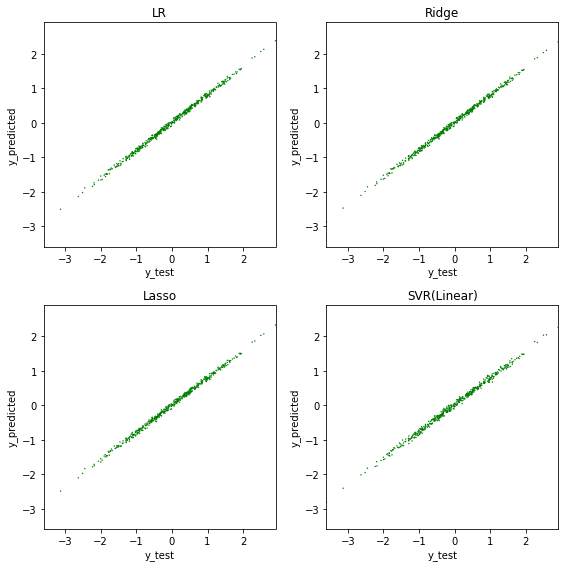

In [13]:
LR = linear_model.LinearRegression()
Ridge = linear_model.Ridge(alpha = 10, random_state = 0)
Lasso = linear_model.Lasso(alpha = 0.01, random_state = 0)
LinearSVR = svm.SVR(C = 0.02, epsilon = 0.1, kernel = 'linear')
regressors = [LR, Ridge, Lasso, LinearSVR]
regressor_names = ['LR', 'Ridge', 'Lasso', 'SVR(Linear)']
plt.figure(figsize = (8, 8))
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y_predicted = r.predict(X_test)
    plt.subplot(2, 2, i + 1)
    plt.title(regressor_names[i])
    plt.scatter(y_test, y_predicted, edgecolor = 'none', s = 2, color = 'green')
    plt.axis([np.min(y_test), np.max(y_test), np.min(y_test), np.max(y_test)])
    print(regressor_names[i] + ' RMSE:', np.sqrt(mean_squared_error(y_test, y_predicted)))
    plt.xlabel('y_test')
    plt.ylabel('y_predicted')
plt.tight_layout()

LR intercept: 0.00315744748496
Ridge intercept: 0.00357248076513
Lasso intercept: 0.00398421092901
SVR(Linear) intercept: 0.0117274175398


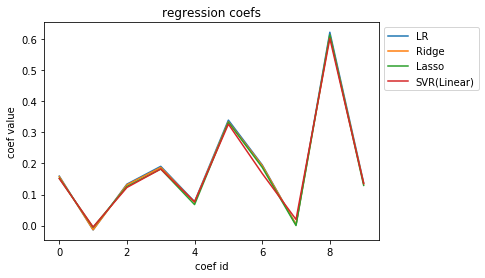

In [14]:
plt.title('regression coefs')
for i,r in enumerate(regressors):
    #plt.figure()
    
    if i < 3:
        plt.plot(r.coef_, label =regressor_names[i])
        print(regressor_names[i] + ' intercept:', r.intercept_)
    else:
        plt.plot(r.coef_[0], label = regressor_names[i])
        print(regressor_names[i] + ' intercept:', r.intercept_[0])
plt.legend(loc = 2, bbox_to_anchor=(1.0, 1.0))
plt.xlabel('coef id')
plt.ylabel('coef value')

## 1.4 high-dimentional test: trains_size = n_features

In [15]:
X, y = datasets.make_regression(n_samples=1000, n_features=100, n_informative=80, effective_rank=None, n_targets=1, bias=2.0, noise=0.2, random_state=2)
X = SS.fit_transform(X)
y = SS.fit_transform(y.reshape(-1, 1))
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=0)
X_train += np.random.randn(X_train.shape[0], X_train.shape[1]) * 0.5
X = np.vstack((X_train, X_test))

LR RMSE: 1.93526755433
Ridge RMSE: 0.681231624203
Lasso RMSE: 0.722871811655
SVR(Linear) RMSE: 0.682905585469


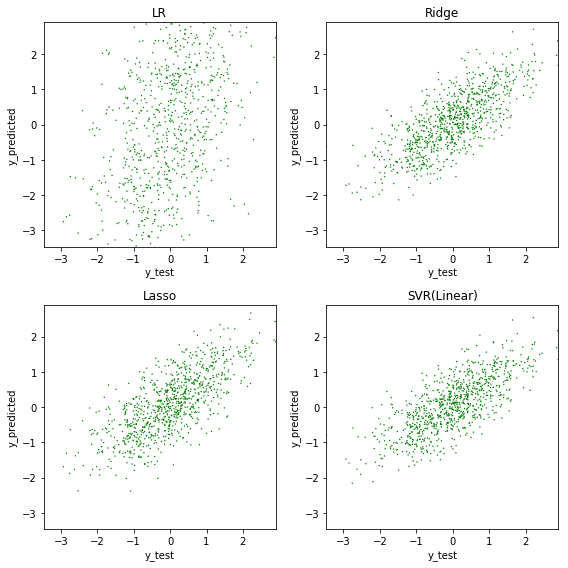

In [16]:
LR = linear_model.LinearRegression()
Ridge = linear_model.Ridge(alpha = 10, random_state = 0)
Lasso = linear_model.Lasso(alpha = 0.01, random_state = 0)
LinearSVR = svm.SVR(C = 0.02, epsilon = 0.1, kernel = 'linear')
regressors = [LR, Ridge, Lasso, LinearSVR]
regressor_names = ['LR', 'Ridge', 'Lasso', 'SVR(Linear)']
plt.figure(figsize = (8, 8))
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y_predicted = r.predict(X_test)
    plt.subplot(2, 2, i + 1)
    plt.title(regressor_names[i])
    plt.scatter(y_test, y_predicted, edgecolor = 'none', s = 2, color = 'green')
    plt.axis([np.min(y_test), np.max(y_test), np.min(y_test), np.max(y_test)])
    print(regressor_names[i] + ' RMSE:', np.sqrt(mean_squared_error(y_test, y_predicted)))
    plt.xlabel('y_test')
    plt.ylabel('y_predicted')
plt.tight_layout()

LR intercept: 0.0535340530068
Ridge intercept: 0.0873921868439
Lasso intercept: 0.0879063693475
SVR(Linear) intercept: 0.0696550230595


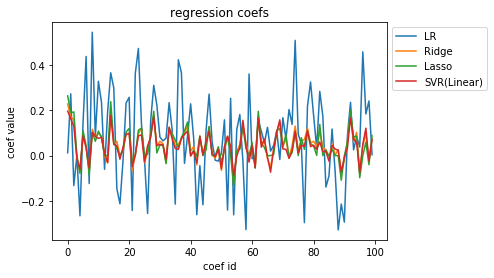

In [17]:
plt.title('regression coefs')
for i,r in enumerate(regressors):
    #plt.figure()
    
    if i < 3:
        plt.plot(r.coef_, label =regressor_names[i])
        print(regressor_names[i] + ' intercept:', r.intercept_)
    else:
        plt.plot(r.coef_[0], label = regressor_names[i])
        print(regressor_names[i] + ' intercept:', r.intercept_[0])
plt.legend(loc = 2, bbox_to_anchor=(1.0, 1.0))
plt.xlabel('coef id')
plt.ylabel('coef value')

/home/yermek/Documents/Teaching/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


min Ridge RMSE: 0.64573187243
min Lasso RMSE: 0.68472803494


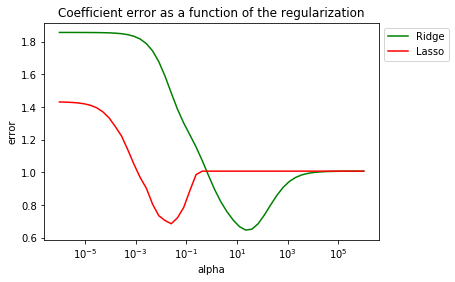

In [18]:
alphas = np.logspace(-6, 6, 50)
errors_Ridge = []
errors_Lasso = []
for a in alphas:
    Ridge = linear_model.Ridge(alpha = a, random_state = 0)
    Ridge.fit(X_train, y_train)
    y_predicted = Ridge.predict(X_test)
    errors_Ridge.append(np.sqrt(mean_squared_error(y_test, y_predicted)))
    Lasso = linear_model.Lasso(alpha = a, random_state = 0)
    Lasso.fit(X_train, y_train)
    y_predicted = Lasso.predict(X_test)
    errors_Lasso.append(np.sqrt(mean_squared_error(y_test, y_predicted)))
ax = plt.gca()
ax.plot(alphas, errors_Ridge, label = 'Ridge', c = 'g')
ax.plot(alphas, errors_Lasso, label = 'Lasso', c = 'r')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.title('Coefficient error as a function of the regularization')
plt.legend(loc = 2, bbox_to_anchor=(1.0, 1.0))
print('min Ridge RMSE:', np.min(errors_Ridge))
print('min Lasso RMSE:', np.min(errors_Lasso))

## 1.5 high-dimentional test: trains_size = n_features, but only few are informative

In [19]:
X, y = datasets.make_regression(n_samples=1000, n_features=100, n_informative=8, effective_rank=None, n_targets=1, bias=2.0, noise=0.2, random_state=2)
X = SS.fit_transform(X)
y = SS.fit_transform(y.reshape(-1, 1))
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=0)
X_train += np.random.randn(X_train.shape[0], X_train.shape[1]) * 0.5
X = np.vstack((X_train, X_test))

LR RMSE: 8.52496407508
Ridge RMSE: 0.755525289123
Lasso RMSE: 0.403825602987
LinearSVR RMSE: 0.765139230113


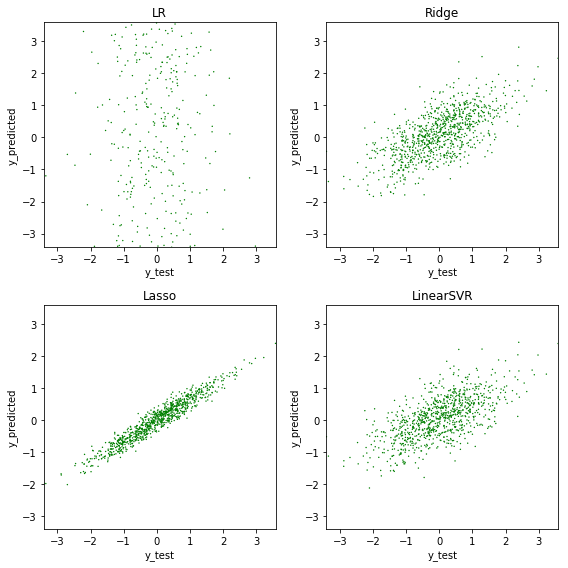

In [20]:
LR = linear_model.LinearRegression()
Ridge = linear_model.Ridge(alpha = 10, random_state = 0)
Lasso = linear_model.Lasso(alpha = 0.05, random_state = 0)
LinearSVR = svm.SVR(C = 0.02, epsilon = 0.1, kernel = 'linear')
regressors = [LR, Ridge, Lasso, LinearSVR]
regressor_names = ['LR', 'Ridge', 'Lasso', 'LinearSVR']
plt.figure(figsize = (8, 8))
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y_predicted = r.predict(X_test)
    plt.subplot(2, 2, i + 1)
    plt.title(regressor_names[i])
    plt.scatter(y_test, y_predicted, edgecolor = 'none', s = 2, color = 'green')
    plt.axis([np.min(y_test), np.max(y_test), np.min(y_test), np.max(y_test)])
    print(regressor_names[i] + ' RMSE:', np.sqrt(mean_squared_error(y_test, y_predicted)))
    plt.xlabel('y_test')
    plt.ylabel('y_predicted')
plt.tight_layout()

LR intercept: 0.350752405443
Ridge intercept: 0.0983688169047
Lasso intercept: -0.0154212352068
LinearSVR intercept: 0.0631560817531


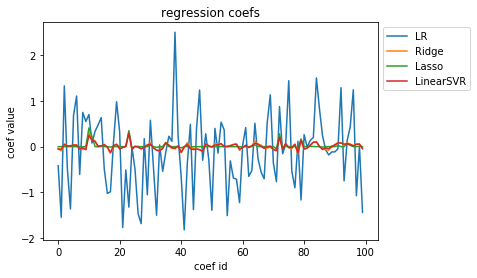

In [21]:
plt.title('regression coefs')
for i,r in enumerate(regressors):
    if i < 3:
        plt.plot(r.coef_, label =regressor_names[i])
        print(regressor_names[i] + ' intercept:', r.intercept_)
    else:
        plt.plot(r.coef_[0], label = regressor_names[i])
        print(regressor_names[i] + ' intercept:', r.intercept_[0])
plt.legend(loc = 2, bbox_to_anchor=(1.0, 1.0))
plt.xlabel('coef id')
plt.ylabel('coef value')

/home/yermek/Documents/Teaching/venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


min Ridge RMSE: 0.7155996432
min Lasso RMSE: 0.406280767196


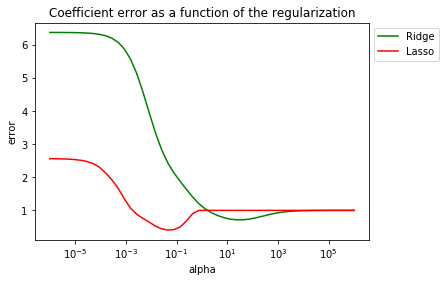

In [22]:
alphas = np.logspace(-6, 6, 50)
errors_Ridge = []
errors_Lasso = []
for a in alphas:
    Ridge = linear_model.Ridge(alpha = a, random_state = 0)
    Ridge.fit(X_train, y_train)
    y_predicted = Ridge.predict(X_test)
    errors_Ridge.append(np.sqrt(mean_squared_error(y_test, y_predicted)))
    Lasso = linear_model.Lasso(alpha = a, random_state = 0)
    Lasso.fit(X_train, y_train)
    y_predicted = Lasso.predict(X_test)
    errors_Lasso.append(np.sqrt(mean_squared_error(y_test, y_predicted)))
ax = plt.gca()
ax.plot(alphas, errors_Ridge, label = 'Ridge', c = 'g')
ax.plot(alphas, errors_Lasso, label = 'Lasso', c = 'r')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.title('Coefficient error as a function of the regularization')
plt.legend(loc = 2, bbox_to_anchor=(1.0, 1.0))
print('min Ridge RMSE:', np.min(errors_Ridge))
print('min Lasso RMSE:', np.min(errors_Lasso))

# 2. Ridge vs Lasso feature selection

In [23]:
X, y = datasets.make_regression(n_samples=200, n_features=20, n_informative=3, effective_rank=None, n_targets=1, bias=2.0, noise=0.2, random_state=6)
X = SS.fit_transform(X)
y = SS.fit_transform(y.reshape(-1, 1))
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train += np.random.randn(X_train.shape[0], X_train.shape[1]) * 0.5
X = np.vstack((X_train, X_test))

In [24]:
alphas = np.logspace(-2, 6, 30)

In [25]:
errors = []
coefs = []
for a in alphas:
    Ridge.set_params(alpha=a)
    Ridge.fit(X_train, y_train)
    coefs.append(Ridge.coef_)
    errors.append(mean_squared_error(y_test, Ridge.predict(X_test)))

/home/yermek/Documents/Teaching/venv/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0039810717055349778,
 2511886.4315095721,
 -0.099672832154439617,
 0.58076671149810577)

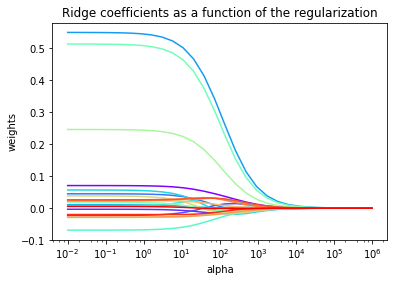

In [26]:
ax = plt.gca()
colors = [cm.rainbow(x) for x in np.linspace(0, 1, len(coefs[0]))]
plt.gca().set_color_cycle(colors)
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

In [27]:
alphas = np.logspace(-3, 1, 30)

In [28]:
errors = []
coefs = []
for a in alphas:
    Lasso.set_params(alpha=a)
    Lasso.fit(X_train, y_train)
    coefs.append(Lasso.coef_)
    errors.append(mean_squared_error(y_test, Lasso.predict(X_test)))

/home/yermek/Documents/Teaching/venv/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.00063095734448019363,
 15.848931924611133,
 -0.098432981684582851,
 0.57942761363382422)

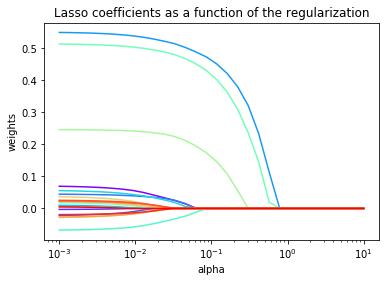

In [29]:
ax = plt.gca()
colors = [cm.rainbow(x) for x in np.linspace(0, 1, len(coefs[0]))]
plt.gca().set_color_cycle(colors)
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

## Application to compressive sensing reconstruction

In [30]:
from scipy import sparse
from scipy import ndimage

In [31]:
# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause
def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """ Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """ Synthetic binary data """
    rs = np.random.RandomState(0)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2) ** 2 + (y - l / 2) ** 2 < (l / 2) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return res - ndimage.binary_erosion(res)



In [32]:
# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l / 7.)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)


/home/yermek/Documents/Teaching/venv/lib/python3.5/site-packages/ipykernel/__main__.py:35: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/yermek/Documents/Teaching/venv/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


In [33]:
# Reconstruction with L2 (Ridge) penalization
rgr_ridge = linear_model.Ridge(alpha=0.1)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

In [34]:
# Reconstruction with no penalization
rgr_lr = linear_model.LinearRegression()
rgr_lr.fit(proj_operator, proj.ravel())
rec_lr = rgr_lr.coef_.reshape(l, l)

In [35]:
# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = linear_model.Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

In [36]:
# Reconstruction with SVR
rgr_svr = svm.SVR(C = 1.0, epsilon = 0.5, kernel = 'linear')
rgr_svr.fit(proj_operator, proj.ravel())
rec_s = rgr_svr.coef_.toarray().reshape(l, l)

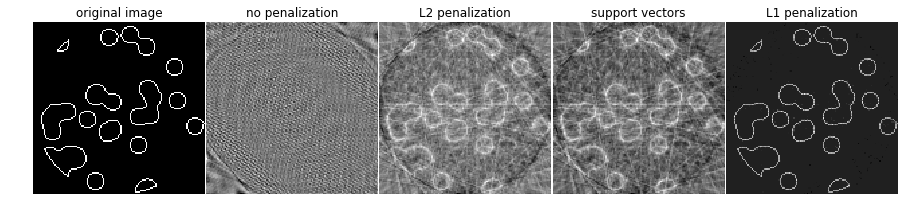

In [37]:
plt.figure(figsize=(12, 3.3))
plt.subplot(151)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(152)
plt.imshow(rec_lr, cmap=plt.cm.gray, interpolation='nearest')
plt.title('no penalization')
plt.axis('off')
plt.subplot(153)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(154)
plt.imshow(rec_s, cmap=plt.cm.gray, interpolation='nearest')
plt.title('support vectors')
plt.axis('off')
plt.subplot(155)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')
plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

plt.show()

# 3. Kernel Ridge vs Kernel SVR

In [38]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
from sklearn import kernel_ridge

In [40]:
def branin(x, a=1, b=5.1/(4*np.pi**2), c=5/np.pi, r=6, s=10, t=1/(8*np.pi)):
    x1 = x[0]
    x2 = x[1]

    term1 = a * (x2 - b*x1**2 + c*x1 - r)**2
    term2 = s*(1-t)*np.cos(x1)

    y = term1 + term2 + s
    return y

In [41]:
xv, yv = np.meshgrid(np.linspace(-5, 15, 51), np.linspace(-5, 20, 51), sparse=False, indexing='ij')

## 3.1 small train size

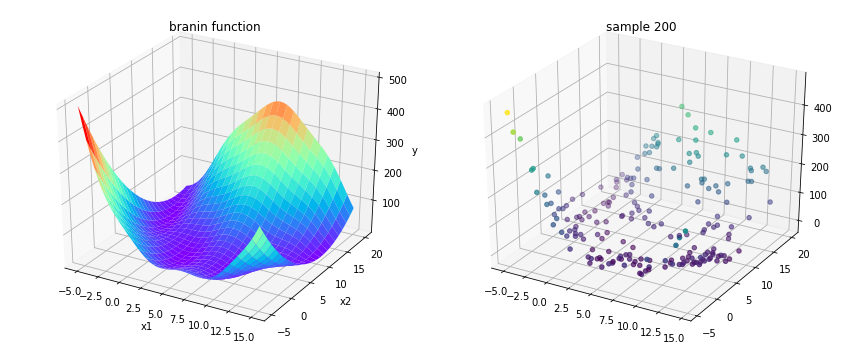

In [42]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121, projection='3d')

zs = np.array([branin(p) for p in zip(np.ravel(xv), np.ravel(yv))])
z = zs.reshape(xv.shape)
plt.title('branin function')
surf = ax.plot_surface(xv, yv, z, rstride=2, cstride=2, cmap=cm.rainbow)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

N_points = 200
sigma_noise = 10
ax = fig.add_subplot(122, projection='3d')
X = np.random.rand(N_points) * 20 - 5
Y = np.random.rand(N_points) * 25 - 5
Z = np.array([branin(p) for p in zip(X, Y)]) + np.random.randn(len(X)) * sigma_noise
ax.scatter(X, Y, Z, c = Z)
plt.title('sample 200')
plt.tight_layout()

In [43]:
X_train.shape

(100, 20)

In [44]:
X_train = np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))
y_train = Z
X_test = np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1)))
y_test = z.ravel()

In [45]:
alphas = np.logspace(-6, 1, 30)

In [46]:
errors = []
kernelRidge = kernel_ridge.KernelRidge(kernel = 'rbf', alpha=0.2, gamma = 0.2)
for a in alphas:
    kernelRidge.set_params(alpha=a)
    kernelRidge.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, kernelRidge.predict(X_test)))

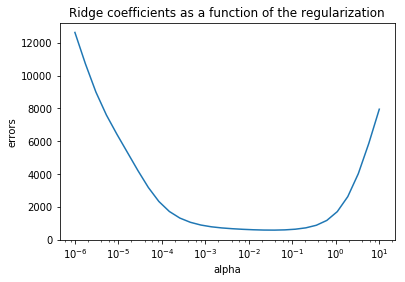

In [47]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
alpha_opt = alphas[np.argmin(errors)]

In [48]:
alpha_opt

0.038566204211634723

In [49]:
errors = []
kernelSVR = svm.SVR(C = 1000, epsilon=3, kernel = 'rbf', gamma = 0.2)
for a in alphas:
    kernelSVR.set_params(C=1/a)
    kernelSVR.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, kernelSVR.predict(X_test)))

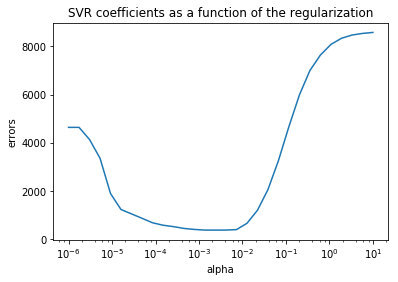

In [50]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('SVR coefficients as a function of the regularization')
plt.axis('tight')
C_opt = 1/alphas[np.argmin(errors)]

In [51]:
C_opt

417.53189365604004

svr rmse: 19.2700286489
ridge rmse: 23.9966495352


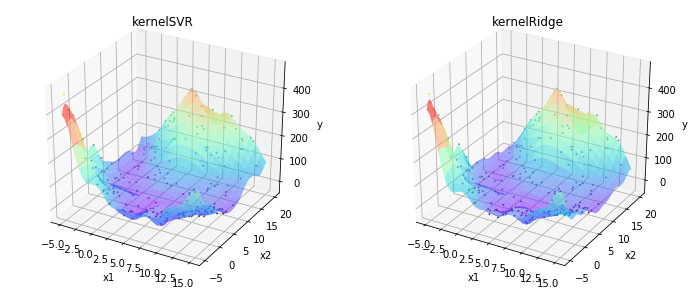

In [52]:
kernelSVR = svm.SVR(C = C_opt, epsilon=3, kernel = 'rbf', gamma = 0.2)
kernelRidge = kernel_ridge.KernelRidge(kernel = 'rbf', alpha=alpha_opt, gamma = 0.2)

kernelSVR.fit(X_train, y_train)
kernelRidge.fit(X_train, y_train)

y_svr = kernelSVR.predict(X_test)
y_ridge = kernelRidge.predict(X_test)

print('svr rmse:', np.sqrt(mean_squared_error(y_test, y_svr)))
print('ridge rmse:', np.sqrt(mean_squared_error(y_test, y_ridge)))
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121, projection='3d')
zs = kernelSVR.predict(np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1))))
z = zs.reshape(xv.shape)
plt.title('kernelSVR')
surf = ax.plot_surface(xv, yv, z, rstride=2, cstride=2, cmap=cm.rainbow, alpha= 0.5, linewidth = 0.1)
ax.scatter(X, Y, Z, c = Z, s = 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax = fig.add_subplot(122, projection='3d')
zs = kernelRidge.predict(np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1))))
z = zs.reshape(xv.shape)
plt.title('kernelRidge')
surf = ax.plot_surface(xv, yv, z, rstride=2, cstride=2, cmap=cm.rainbow, alpha = 0.5, linewidth = 0.1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.scatter(X, Y, Z, c = Z, s = 1)

In [53]:
len(kernelSVR.support_vectors_)

171

## 3.2 larger train size

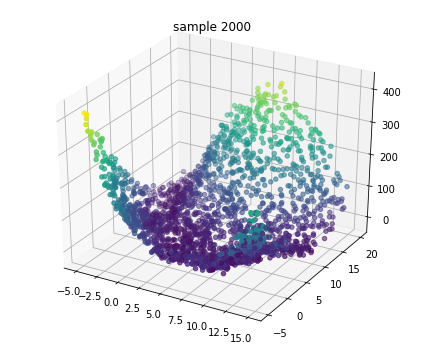

In [54]:
fig = plt.figure(figsize = (6, 5))

N_points = 2000
sigma_noise = 10
ax = fig.add_subplot(111, projection='3d')
X = np.random.rand(N_points) * 20 - 5
Y = np.random.rand(N_points) * 25 - 5
Z = np.array([branin(p) for p in zip(X, Y)]) + np.random.randn(len(X)) * sigma_noise
ax.scatter(X, Y, Z, c = Z)
plt.title('sample 2000')
plt.tight_layout()

In [55]:
X_train = np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))
y_train = Z
X_test = np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1)))
y_test = z.ravel()

In [56]:
errors = []
kernelRidge = kernel_ridge.KernelRidge(kernel = 'rbf', alpha=0.2, gamma = 0.2)
for a in alphas:
    kernelRidge.set_params(alpha=a)
    kernelRidge.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, kernelRidge.predict(X_test)))

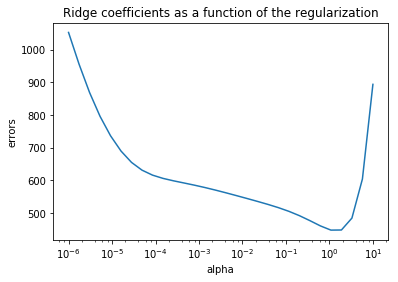

In [57]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
alpha_opt = alphas[np.argmin(errors)]

svr rmse: 23.3102155312
ridge rmse: 21.1495773178


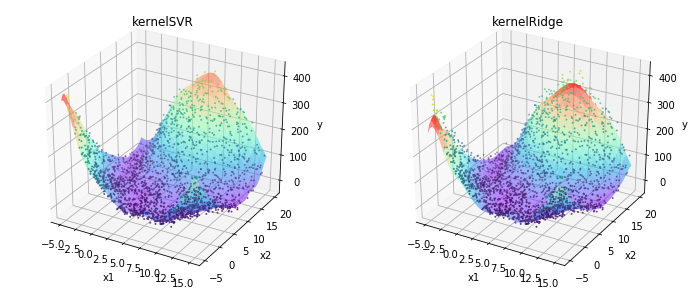

In [58]:
kernelSVR = svm.SVR(C = 1000, epsilon=15, kernel = 'rbf', gamma = 0.2)
kernelRidge = kernel_ridge.KernelRidge(kernel = 'rbf', alpha=alpha_opt, gamma = 0.2)

kernelSVR.fit(X_train, y_train)
kernelRidge.fit(X_train, y_train)

y_svr = kernelSVR.predict(X_test)
y_ridge = kernelRidge.predict(X_test)

print('svr rmse:', np.sqrt(mean_squared_error(y_test, y_svr)))
print('ridge rmse:', np.sqrt(mean_squared_error(y_test, y_ridge)))
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121, projection='3d')
zs = kernelSVR.predict(np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1))))
z = zs.reshape(xv.shape)
plt.title('kernelSVR')
surf = ax.plot_surface(xv, yv, z, rstride=2, cstride=2, cmap=cm.rainbow, alpha= 0.5, linewidth = 0.1)
ax.scatter(X, Y, Z, c = Z, s = 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax = fig.add_subplot(122, projection='3d')
zs = kernelRidge.predict(np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1))))
z = zs.reshape(xv.shape)
plt.title('kernelRidge')
surf = ax.plot_surface(xv, yv, z, rstride=2, cstride=2, cmap=cm.rainbow, alpha = 0.5, linewidth = 0.1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.scatter(X, Y, Z, c = Z, s = 1)

In [59]:
len(kernelSVR.support_vectors_)

343

## 3.3 Training / prediction time

In [60]:
%timeit kernelSVR.fit(X_train, y_train)

1 loop, best of 3: 805 ms per loop


In [61]:
%timeit kernelRidge.fit(X_train, y_train)

1 loop, best of 3: 349 ms per loop


In [62]:
%timeit kernelSVR.predict(np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1))))

10 loops, best of 3: 25.5 ms per loop


In [63]:
%timeit kernelRidge.predict(np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1))))

1 loop, best of 3: 238 ms per loop


# 4. NuSVR

In [96]:
N_points = 1000
sigma_noise = 1
X = np.random.rand(N_points) * 20 - 5
Y = np.random.rand(N_points) * 25 - 5
Z = np.array([branin(p) for p in zip(X, Y)]) + np.random.randn(len(X)) * sigma_noise

In [97]:
X_train = np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))
y_train = Z
X_test = np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1)))
y_test = z.ravel()

In [98]:
NuSVR = svm.NuSVR(nu=0.5, C=400.0, kernel='rbf', gamma=0.2)

In [99]:
NuSVR.fit(X_train, y_train)

NuSVR(C=400.0, cache_size=200, coef0=0.0, degree=3, gamma=0.2, kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [100]:
y_nusvr = NuSVR.predict(X_test)

nu-svr rmse: 1.35743437534


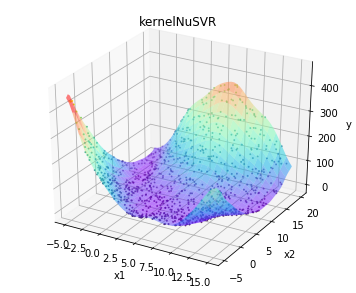

In [101]:
print('nu-svr rmse:', np.sqrt(mean_squared_error(y_test, y_nusvr)))
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111, projection='3d')
zs = NuSVR.predict(np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1))))
z = zs.reshape(xv.shape)
plt.title('kernelNuSVR')
surf = ax.plot_surface(xv, yv, z, rstride=2, cstride=2, cmap=cm.rainbow, alpha= 0.5, linewidth = 0.1)
ax.scatter(X, Y, Z, c = Z, s = 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [102]:
errors = []
nus = np.linspace(0.1, 0.9, 9)
for cur_nu in nus:
    NuSVR.set_params(nu = cur_nu)
    NuSVR.fit(X_train, y_train)
    errors.append(np.sqrt(mean_squared_error(y_test, NuSVR.predict(X_test))))
    print('nu = ' + str(cur_nu), 'SV fraction = ' + str(float(len(NuSVR.support_vectors_))/len(X_train)))

nu = 0.1 SV fraction = 0.282
nu = 0.2 SV fraction = 0.382
nu = 0.3 SV fraction = 0.478
nu = 0.4 SV fraction = 0.567
nu = 0.5 SV fraction = 0.675
nu = 0.6 SV fraction = 0.77
nu = 0.7 SV fraction = 0.866
nu = 0.8 SV fraction = 0.971
nu = 0.9 SV fraction = 1.0


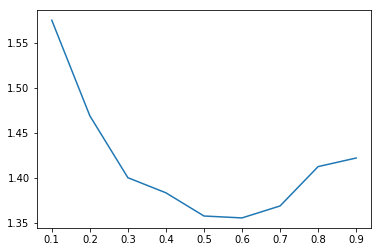

In [103]:
plt.plot(nus, errors)